## PCA 

orthogonal linear transformation that transforms the data to a new coordinate system such that the greatest variance by some scalar projection of the data comes to lie on the first coordinate (PC1), the second greatest variance on the second coordinate (PC2), and so on

Choose the hyperplane which preserves the maximum amount of variance and project data onto it

Characteristics of PCA:
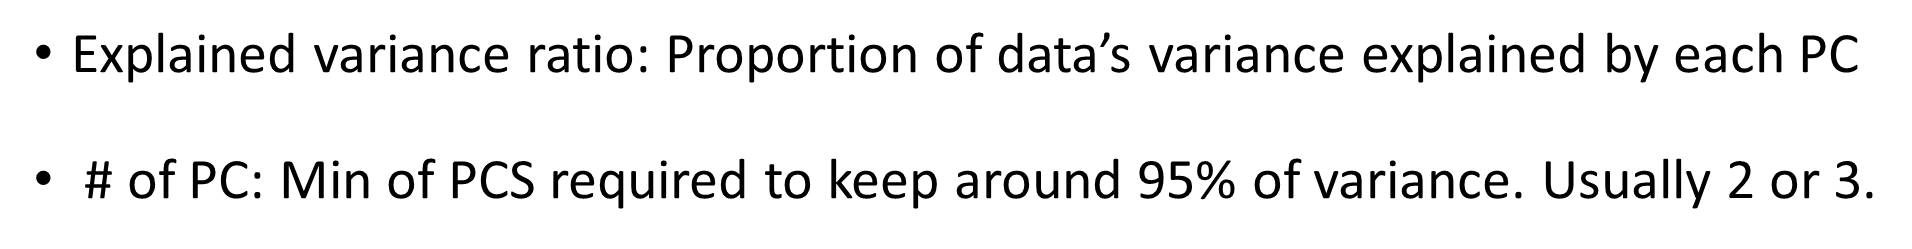

### Manually

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Select the dataset

wine = pd.read_csv('wine.csv')
# wine

# Preprocessing

X = wine.drop(['Wine'], axis = 1)
# X
y = wine['Wine']
# y

# Standardization of features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
# X_scaled

In [7]:
# Constructing the covariance matrix
cm = np.cov(X_scaled.T)
# print('Covariance matrix')
# print(cm)
print('Shape of covariance matrix:',cm.shape)

Shape of covariance matrix: (13, 13)


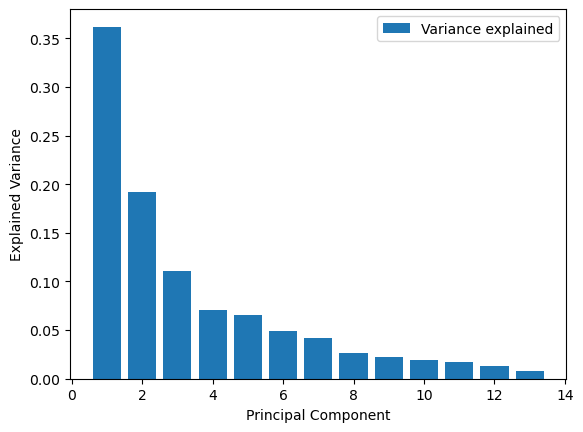

In [15]:
# Finding eigen value and eigen vectors

eig_val, eig_vec = np.linalg.eig(cm)
# eig_val
# eig_vec

# Sort the eigen values in decreasing order
tot = sum(eig_val)
# tot

sorted_eig_val = [i for i in sorted(eig_val, reverse = True)]
# sorted_eig_val
 
exp_var = [(i/tot) for i in sorted_eig_val]
cum_exp_var = np.cumsum(exp_var)
# cum_exp_var

plt.bar(range(1, 14), exp_var, label = 'Variance explained')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.legend();

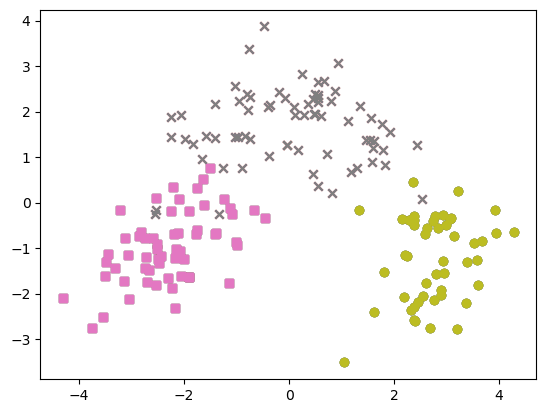

In [27]:
# Choosing dimension = 2
## Taking the pair of eigen value and eigen vector
eigen_pair = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]
# eigen_pair

## Constucting a projection matrix
## taking only 2 dimensions
w = np.hstack((eigen_pair[0][1][:,np.newaxis],
              eigen_pair[1][1][:,np.newaxis]))
# w
# w.shape # o/p: (13, 2)

# Transforming 12 dimensions to 2 dimensions
new_X = X_scaled.dot(w)
# new_X
# new_X.shape # o/p: (178, 2)

# Plotting the transformed points
for l in np.unique(y):
    plt.scatter(new_X[y==1, 0], new_X[y==1, 1], marker = 's') #new_X[y==1,0] selects the values in the first column of new_X where y equals 1, 
    #and new_X[y==1,1] selects the values in the 
    #second column of new_X where y equals 1.
    plt.scatter(new_X[y==2, 0], new_X[y==2, 1], marker = 'x')
    plt.scatter(new_X[y==3, 0], new_X[y==3, 1], marker = 'o')

### Using sklearn

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
X_pca = pca.fit_transform(X_scaled)
print('pca components\n', pca.components_.T[:,1]) # T because the rows of the components_ array correspond to 
                                                #the original features of the dataset, while the columns correspond to 
                                                #the principal components.
print('\npca explained variance ratio\n', pca.explained_variance_ratio_)

pca components
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
  0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
 -0.36490283]

pca explained variance ratio
 [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019]


In [39]:
pca.components_.T.shape

(13, 10)

In [40]:
pca.n_components_

10

In [41]:
## another way
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)
print('pca components\n', pca.components_.T[:,1]) # T because the rows of the components_ array correspond to 
                                                #the original features of the dataset, while the columns correspond to 
                                                #the principal components.
print('\npca explained variance ratio\n', pca.explained_variance_ratio_)

pca components
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
  0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
 -0.36490283]

pca explained variance ratio
 [0.36198848 0.1920749 ]


In [44]:
0.36198848+0.1920749

0.55406338

2 principal components explain 55.40 of the variance in the data

In [43]:
pca.components_.T.shape

(13, 2)

In [42]:
pca.n_components_

2

## LDA 

maximize classes separability(maximmize distance between different clusters), minimize distance among data points of same cluster

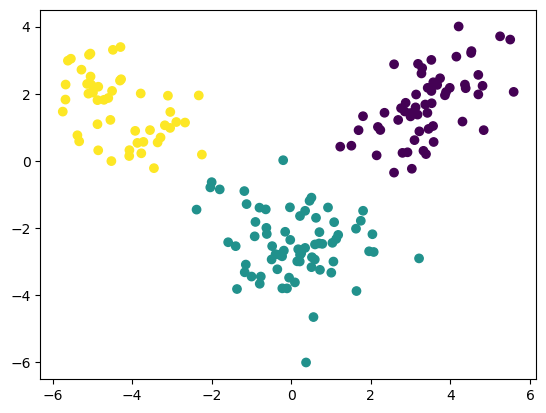

In [49]:
# everything same upto standardisation of features and obtaining X_scaled as above

# Building the LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 2)

# Transformation of data
X_lda = lda.fit_transform(X_scaled, y)
# X_lda

# Visualization of transformed data
plt.scatter(X_lda[:,0], X_lda[:,1], c = y)

## LLE

seeks a lower-dimensional projection of the data which preserves distances within local neighborhoods (used for swiss roll datasets). It can be thought of as a series of local Principal Component Analyses which are globally compared to find the best non-linear embedding

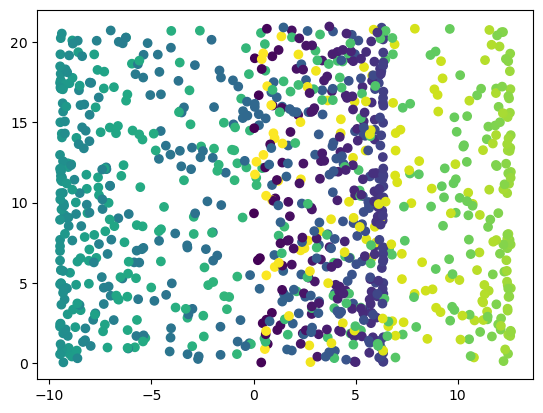

In [51]:
from sklearn.datasets import make_swiss_roll

X, y = make_swiss_roll(n_samples = 1000, random_state = 100)
# X
# y
# 2d plot
plt.scatter(X[:,0], X[:,1], c = y)

In [52]:
X.shape

(1000, 3)

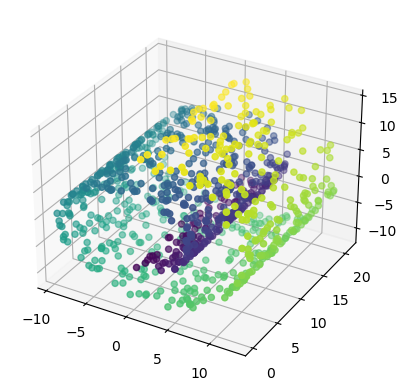

In [55]:
## 3 d plot (own idea)
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data as a scatter plot
ax.scatter(X[:,0], X[:,1], X[:,2], c=y)

# Show the plot
plt.show()

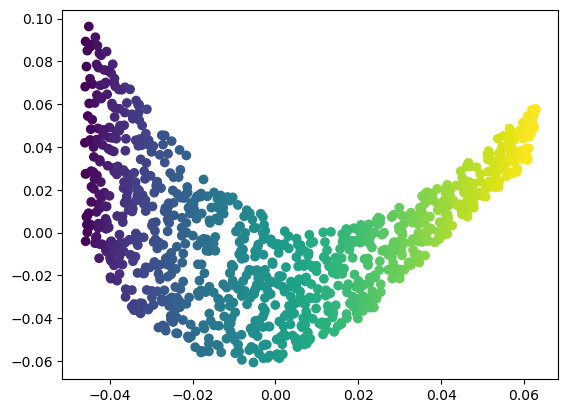

In [80]:
# Building the model
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_neighbors = 12, n_components = 2)

# transforming the data
X_lle = lle.fit_transform(X)
# X_lle

# Visualization
plt.scatter(X_lle[:,0], X_lle[:,1], c = y)

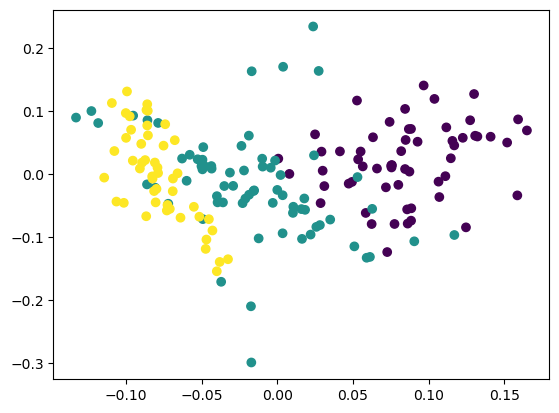

In [113]:
## Trying with wine dataset
# Select the dataset

X = wine.drop(['Wine'], axis = 1)
# X
y = wine['Wine']
# y

# Standardization of features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
lle = LocallyLinearEmbedding(n_neighbors = 13, n_components = 2)

# transforming the data
X_lle_wine = lle.fit_transform(X_scaled)
# X_lle

# Visualization
plt.scatter(X_lle_wine[:,0], X_lle_wine[:,1], c = y)



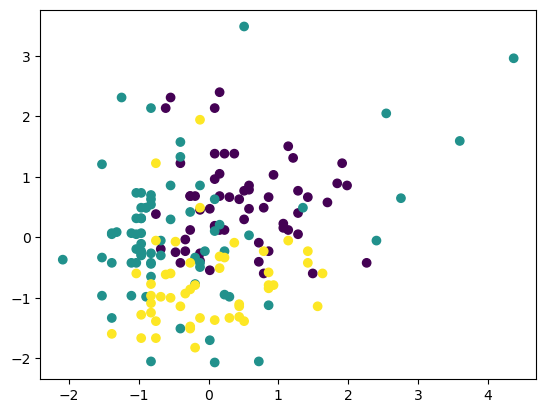

In [119]:
# wine.shape
plt.scatter(X_scaled[:,4], X_scaled[:, 8], c = y) # plotting random features

## tSNE

a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.

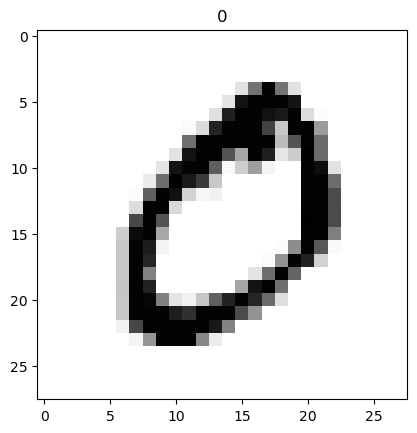

In [120]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version = 1, return_X_y = True)
# X.shape # o/p: (70000, 784)
# X.head()
# y.head()
# y.value_counts() # o/p:0 to 9 digits and their counts
# X.iloc[1] # 2nd row of X

# Plotting the images
plt.imshow(X.iloc[1].to_numpy().reshape(28,28), 'Greys')
plt.title(y[1]);

C:\Users\Urvi Sharma\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Urvi Sharma\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


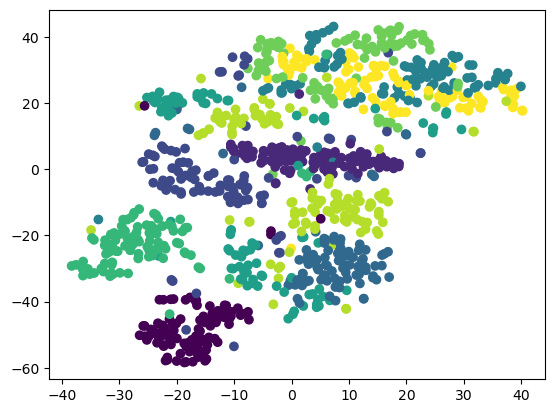

In [122]:
# Creating a random sample of 1k from 70k
np.random.seed(100)
sample = np.random.choice(X.shape[0], 1000) #X.shape[0] returns the number of rows in the array or matrix X. 
                                            #The np.random.choice function takes two arguments: 
                                            #the first argument is the number of rows of X and the second argument 
                                            #is the number of samples to be drawn from X without replacement.
# print(sample) # contains the 1000 randomly selected indices

# Creating a new set of 1000
X1 = X.iloc[sample,:]
# X1.shape # o/p (1000, 784)
# X1.head()

y1 = y[sample]
# y1.shape
# y1.head()

# Building the tSNE model
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, perplexity = 30)
X_tsne = tsne.fit_transform(X1)
# X_tsne.shape

# Visualization of transformed points
plt.scatter(X_tsne[:,0], X_tsne[:,1], c = y1.astype(float));

<Figure size 1500x1200 with 0 Axes>

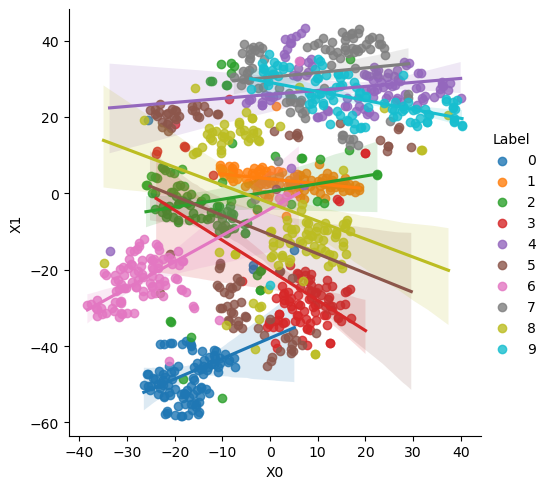

In [125]:
# Creating a df for better visualization
X_df = pd.DataFrame({'X0':X_tsne[:,0],
                    'X1':X_tsne[:,1],
                    'Label':y1})
#X_df
import seaborn as sns
plt.figure(figsize = (15, 12))
sns.lmplot(data = X_df, x = 'X0', y = 'X1', hue = 'Label')

<Figure size 1500x1200 with 0 Axes>

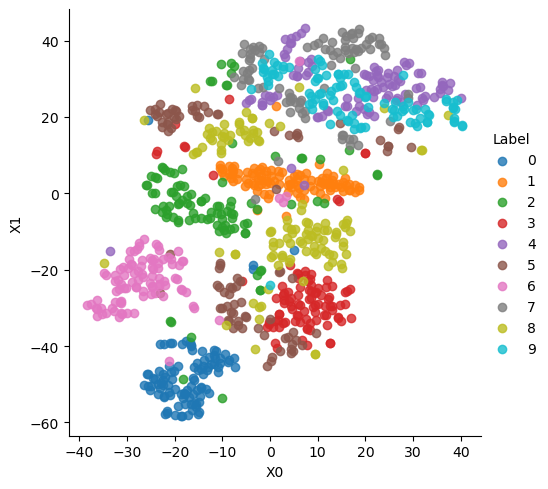

In [126]:
plt.figure(figsize = (15, 12))
sns.lmplot(data = X_df, 
           x = 'X0', 
           y = 'X1', 
           hue = 'Label',
          fit_reg = False)

In [127]:
# tsne on wine dataset

tsne_wine = TSNE(n_components = 2, perplexity = 30)
X_tsne_wine = tsne_wine.fit_transform(X_scaled)
X_tsne_wine.shape

C:\Users\Urvi Sharma\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Urvi Sharma\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(178, 2)

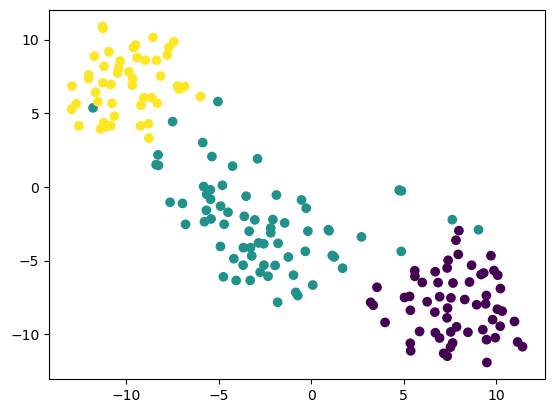

In [131]:
y_wine = wine['Wine']
plt.scatter(X_tsne_wine[:,0],
            X_tsne_wine[:,1], 
            c=y_wine.astype(float));

PCA - unsupervised
LDA - supervised
LLE - unsupervised

PCA: Linear, Variability is large, Projection

Factor Analysis: Based on correlation.

LDA: Linear, Projection, Class-focused.

LLE: Linear, Manifold learning

t-SNE: Non-linear. Manifold learning. Local and global characteristics preserved.


## Hierarchical Clustering

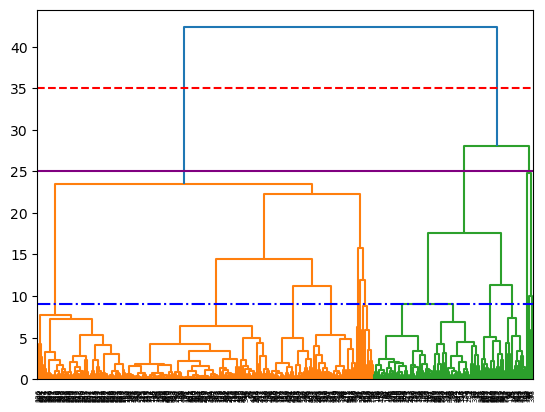

In [138]:
cust = pd.read_csv('wholesale_customers.csv')
# cust

# Standardisation of features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(cust)
# X

# converting into df
X = pd.DataFrame(X, columns = cust.columns)
# X

# Drawing dendrogram
import scipy.cluster.hierarchy as sch
dendro = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.axhline(y = 35, color = 'red', linestyle = '--')
plt.axhline(y = 25, color = 'purple', linestyle = '-')
plt.axhline(y = 9, color = 'blue', linestyle = '-.');

<AxesSubplot: xlabel='Milk', ylabel='Grocery'>

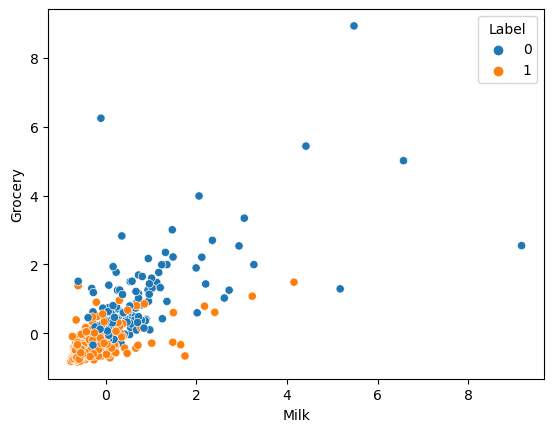

In [141]:
# Agglomerative lustering using sklearn
from sklearn.cluster import AgglomerativeClustering

clust = AgglomerativeClustering(n_clusters = 2, linkage = 'ward') # ward linkage helps create equal sized clusters
clust.fit_predict(X)
#clust.labels_

#Adding labels to df
X['Label'] = pd.Series(clust.labels_)
# X

# Analysing customer segments
## No. of customers in each segment
X['Label'].value_counts()

## Listing all customers belonging to segment '0'
X[X['Label'] == 0]

## Listing all customers belonging to segment '1'
X[X['Label']==1]

## Buying pattern of milk and grocery
sns.scatterplot(x = X['Milk'], y = X['Grocery'], hue = X['Label'])

<Figure size 1200x1200 with 0 Axes>

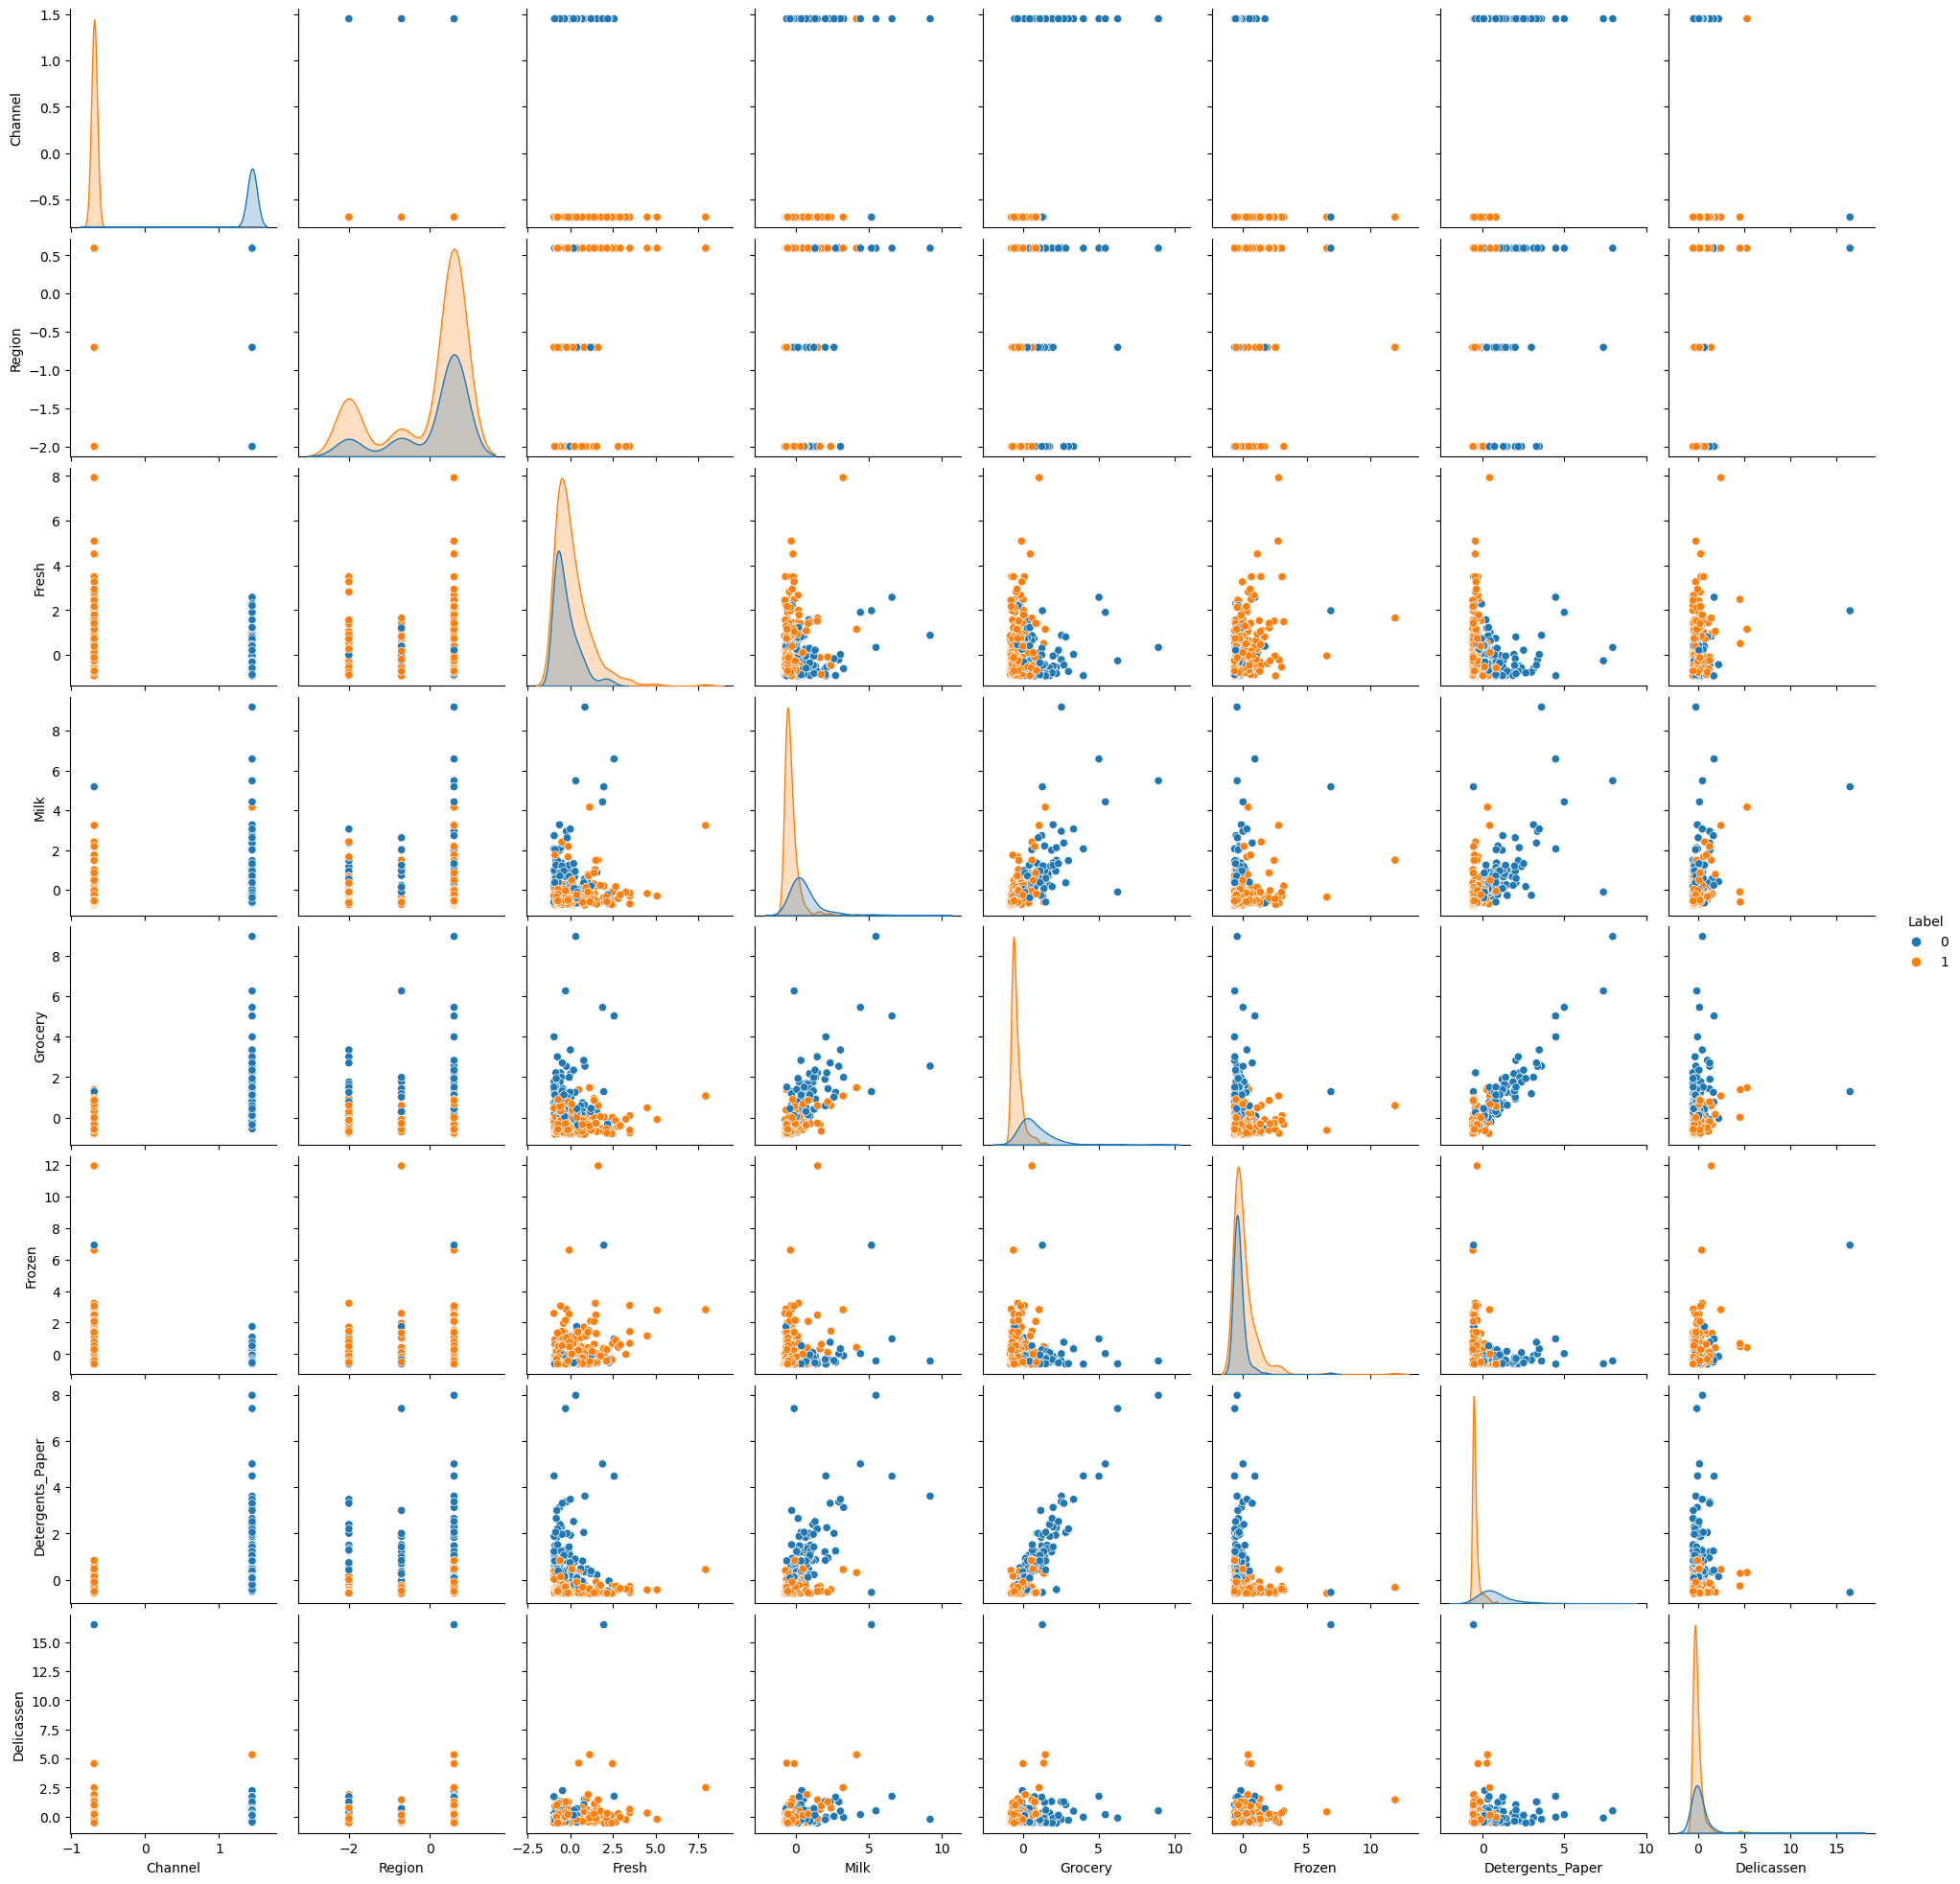

In [142]:
plt.figure(figsize = (12, 12))
sns.pairplot(data = X, hue = 'Label')

## Gaussian Mixture Model

Probabilistic Model

Assume that Data are generated from a mixture of many Gaussian distributions.


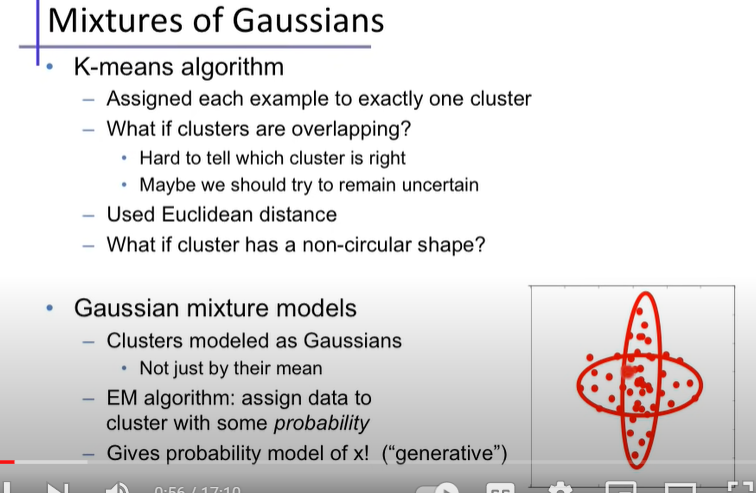

C:\Users\Urvi Sharma\AppData\Local\Temp\ipykernel_14772\981358114.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X, kde = True, hist = False)


<AxesSubplot: ylabel='Density'>

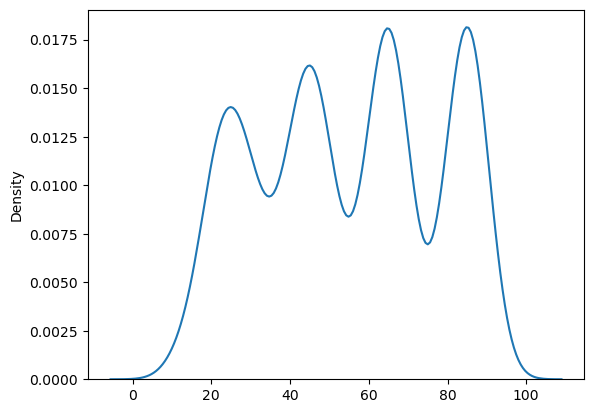

In [11]:
# Creating samples
np.random.seed(100)
X1 = np.random.normal(loc = 25, scale = 6, size = 2000)
# sns.distplot(X1, color = 'red', kde = True)
X2 = np.random.normal(loc = 45, scale = 5, size = 2000)
# sns.distplot(X2,color='blue',kde=True);
X3 = np.random.normal(loc = 65, scale = 4, size = 2000)
# sns.distplot(X3, color = 'green', kde = True)
X4 = np.random.normal(loc = 85, scale = 4, size = 2000)
# sns.distplot(X4, color = 'yellow', kde = True)

# Merging
X = np.hstack((X1, X2, X3, X4))
# x

# sns.distplot(X, kde = True)
sns.distplot(X, kde = True, hist = False)

X is a Gaussian mixture model

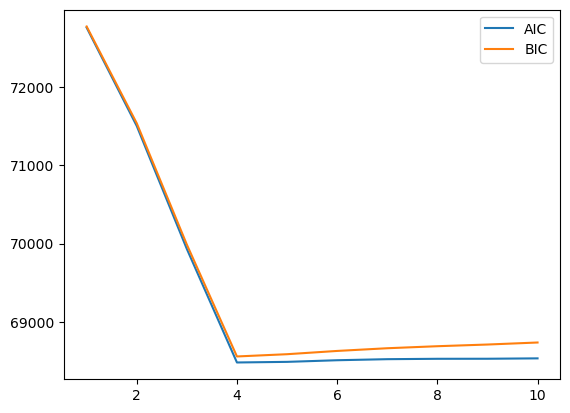

In [16]:
# Building a GMM with 4 clusters

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 4, n_init = 10)

# training
gmm.fit(X.reshape(-1, 1))

# prediction
pred = gmm.predict(X.reshape(-1, 1))
# pred
# np.unique(pred) # o/p: array([0, 1, 2, 3])
# gmm.means_
# gmm.covariances_
# gmm.weights_
# np.bincount(pred) # o/p: array([1996, 2012, 1969, 2023])

# finding no. of clusters
n_components = np.arange(1, 11)
aic_scores = []
bic_scores = []

for n in n_components:
    model = GaussianMixture(n, n_init = 10)
    model.fit(X.reshape(-1, 1))
    aic_score = model.aic(X.reshape(-1, 1))
    bic_score = model.bic(X.reshape(-1, 1))
    aic_scores.append(aic_score)
    bic_scores.append(bic_score)
    
plt.plot(n_components, aic_scores, label = 'AIC')
plt.plot(n_components, bic_scores, label = 'BIC')
plt.legend();

no. of lcusters = 4

In [ ]:
# Generating samples

gmm.sample(100000)

###### gmm on dataset

In [ ]:
data=pd.read_csv('gmm_data.csv')
# data
# sns.pairplot(data);

# finding no. of clusters
n_components=np.arange(1,11)
aic_scores=[]
bic_scores=[]
for n in n_components:
    model=GaussianMixture(n,n_init=10)
    model.fit(data)
    aic_score=model.aic(data)
    bic_score=model.bic(data)
    aic_scores.append(aic_score)
    bic_scores.append(bic_score)

plt.plot(n_components,aic_scores,label='AIC')
plt.plot(n_components,bic_scores,label='BIC')
plt.legend();

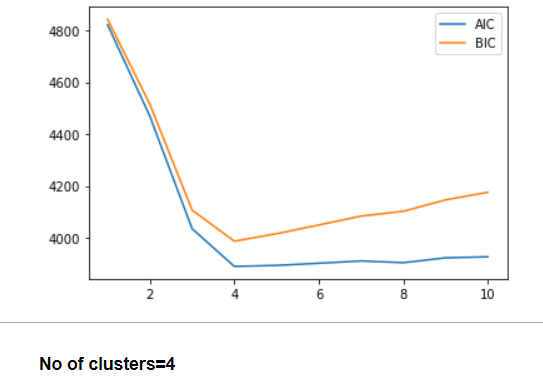

In [ ]:
# Model building
gmm_data=GaussianMixture(n_components=4,n_init=10)
gmm_data.fit(data)

data_pred=gmm_data.predict(data)
# data_pred

# gmm_data.means_
# gmm_data.covariances_
# gmm_data.weights_

# adding cluster labels to df
data['Label']=data_pred
# data
# data['Label'].value_counts()

#visualize clusters
sns.pairplot(data, hue='Label');



## Mall customer segmentation

C:\Users\Urvi Sharma\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Urvi Sharma\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


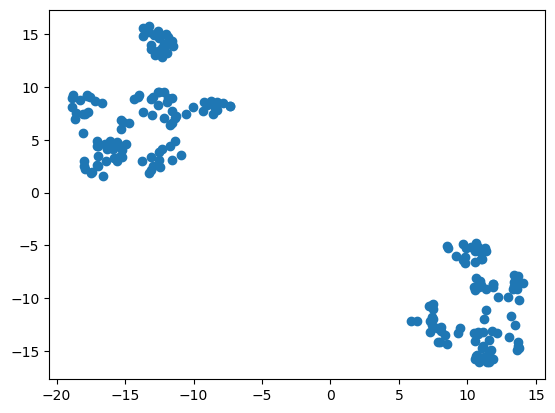

In [18]:
# Accessing the dataset
customer = pd.read_csv('Mall_customers.csv')
# customer

## Dropping Customer ID
customer = customer.drop(['CustomerID'], axis = 1)
# customer

## Converting categorical to numeric (one hot encoding)
cust = pd.get_dummies(customer)
# cust

## Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(cust)
# X

# Converting array to dataframe
X = pd.DataFrame(X, columns = cust.columns)
# X

## dimensionality reduction
from sklearn.manifold import TSNE

# Parameters: n_components = no. of clusters; perplexity = no. of neighbours
tsne = TSNE(n_components = 2, random_state = 100)
# type(tsne)
X_tsne = tsne.fit_transform(X)
# X_tsne

# visualization
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

Findings:
Cluster formation is clear

No. of clusters may be 2

In [19]:
## clustering using gmm
from sklearn.mixture import GaussianMixture

n_comps = np.arange(1, 20, 1)
aic_score = []
bic_score = []
for n in n_comps:
    model = GaussianMixture(n_components = n,
                           random_state = 100,
                           n_init = 5)
    model.fit(X)
    aic_score.append(model.aic(X))
    bic_score.append(model.bic(X))
    
# print('AIC Score:\n', aic_score, '\n\nBIC Score:\n', bic_score)
# plt.plot(n_comps, aic_score, c = 'r', label = 'AIC')
# plt.plot(n_comps, bic_score, c = 'g', label = 'BIC')
# plt.legend(); # o/p: No. of clusters = 2

# Creating a GM model with 2 clusters
gm = GaussianMixture(n_components = 2, random_state = 100, n_init = 5)
gm.fit(X)
pred = gm.predict(X)
# pred

# print('GM Means:\n', gm.means_, '\n\nGM Covariances:\n', gm.covariances_, '\n\nGM Weights:\n',gm.weights_)

# adding cluster labels to df
customer['Label'] = pred
customer['Label'].value_counts()
customer['Label'].value_counts(normalize = True)

C:\Users\Urvi Sharma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Urvi Sharma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Urvi Sharma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Urvi Sharma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have

1    0.56
0    0.44
Name: Label, dtype: float64

In [ ]:
# customer

## Insights

In [ ]:
customer[customer['Gender'] =='Male']

customer[customer['Gender'] =='Male'][customer['Label'] == 0] 
# ^^ All Males form a market segment, constituting 44% of the customer base.

customer[customer['Gender'] =='Female'][customer['Label'] == 0]
#^^ Therefore, all the female customers belong to the other segment 
#(with label '1') All female customers form a segment, constituting 56 % of the customer base.

customer[customer['Gender']=='Female'][customer['Label']==1]
## 10000 samples
gm.sample(10000)
